In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,recall_score, f1_score


In [2]:
# Step 1: Load Dataset
file_path = 'Stress.csv'
data = pd.read_csv(file_path)
data.head()

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?","2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?","3. In a semester, how often you felt nervous and stressed because of academic pressure?","4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)","5. In a semester, how often you felt confident about your ability to handle your academic / university problems?","6. In a semester, how often you felt as if things in your academic life is going on your way?","7. In a semester, how often are you able to control irritations in your academic / university affairs?","8. In a semester, how often you felt as if your academic performance was on top?","9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control?","10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them?",Stress Value,Stress Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,3,4,3,2,2,1,2,2,4,4,29,High Perceived Stress
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,3,4,2,3,2,2,2,2,3,24,Moderate Stress
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0,0,0,0,0,1,0,0,0,0,15,Moderate Stress
3,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,1,2,1,4,3,2,2,3,2,17,Moderate Stress
4,18-22,Male,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,4,4,4,2,2,2,0,2,4,4,32,High Perceived Stress


In [3]:
# Step 2: Initial Exploration and Preprocessing
# Dataset overview
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 19 columns):
 #   Column                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                      --------------  ----- 
 0   1. Age                                                                                                                                      2028 non-null   object
 1   2. Gender                                                                                                                                   2028 non-null   object
 2   3. University                                                                                                                               2028 non-null   object
 3   4. Department                                   

,"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?","2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?","3. In a semester, how often you felt nervous and stressed because of academic pressure?","4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)","5. In a semester, how often you felt confident about your ability to handle your academic / university problems?","6. In a semester, how often you felt as if things in your academic life is going on your way?","7. In a semester, how often are you able to control irritations in your academic / university affairs?","8. In a semester, how often you felt as if your academic performance was on top?","9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control?","10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them?",Stress Value
count,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000
mean,2.350099,2.326923,2.708087,2.369329,2.173077,1.790927,1.932446,1.721893,2.426036,2.435897,22.998028
std,1.178962,1.156746,1.132379,1.222703,1.084549,1.098807,1.019723,1.132371,1.177386,1.166602,6.755071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,19.000000
50%,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,22.000000
75%,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,27.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,40.000000


In [4]:
missing_value= data.isnull().sum()

print(missing_value)
print(missing_value[missing_value > 0])

1. Age                                                                                                                                        0
2. Gender                                                                                                                                     0
3. University                                                                                                                                 0
4. Department                                                                                                                                 0
5. Academic Year                                                                                                                              0
6. Current CGPA                                                                                                                               0
7. Did you receive a waiver or scholarship at your university?                                                                          

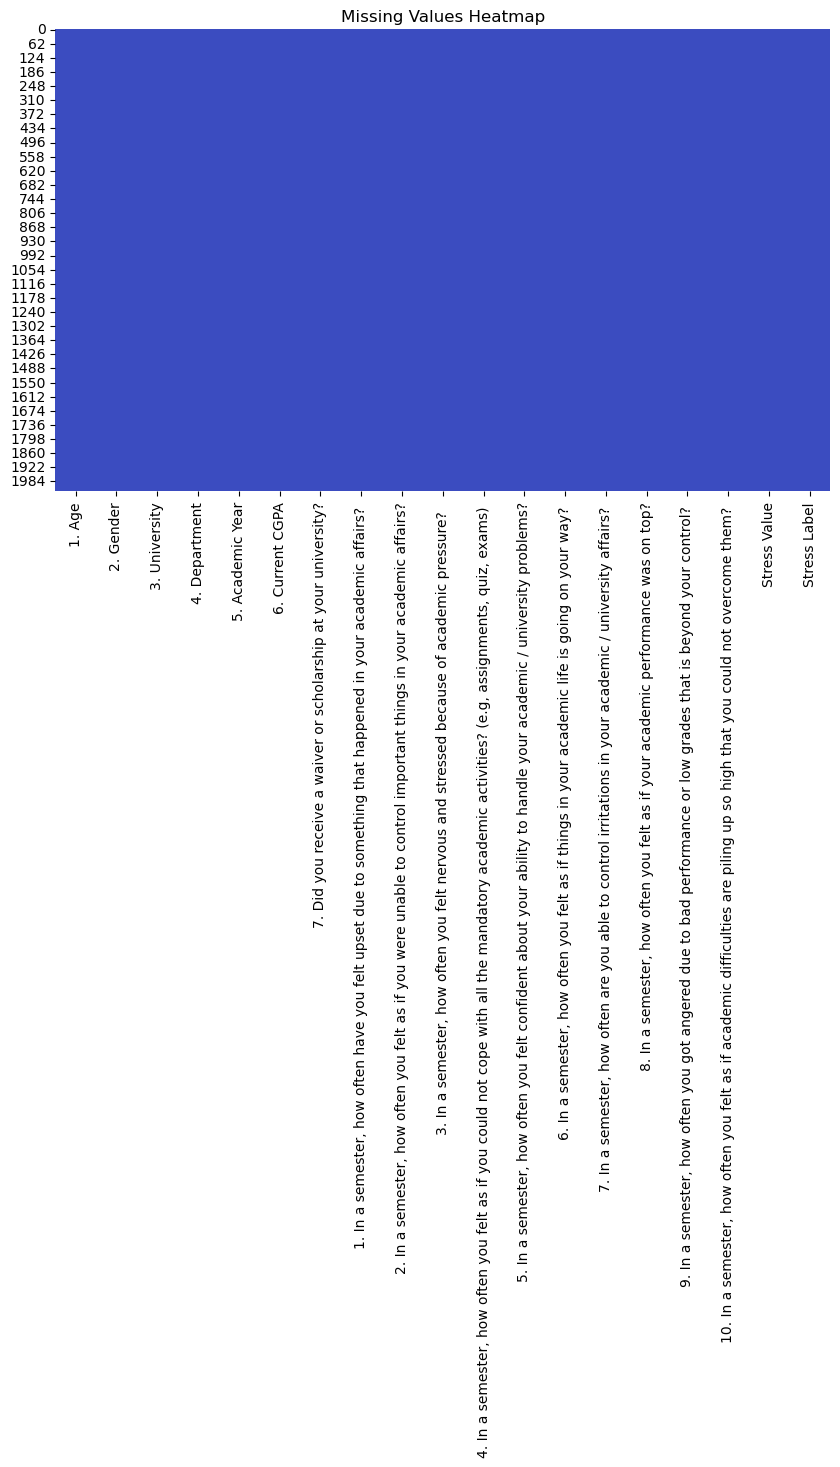

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values Heatmap")
plt.show()

C:\Users\suhan\AppData\Local\Temp\ipykernel_16948\2730103229.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Stress Label'], palette= 'viridis')


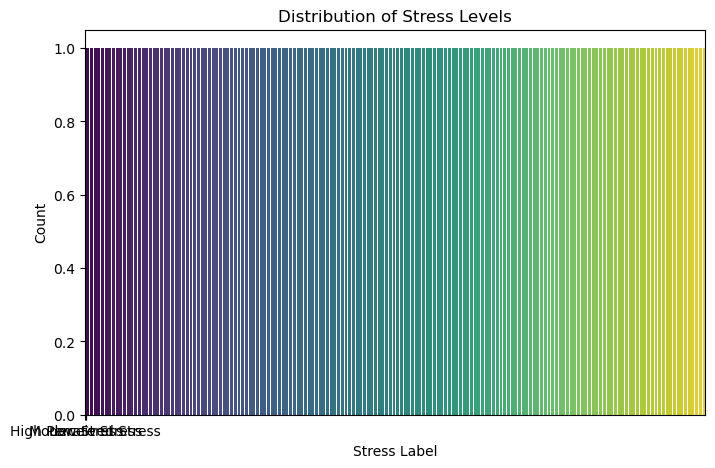

In [6]:
# Encode the target variable
label_encoder = LabelEncoder()
data['Stress Label'] = label_encoder.fit_transform(data['Stress Label'])

# Visual 1: Class Distribution of Target Variable
plt.figure(figsize=(8, 5))
sns.countplot(data['Stress Label'], palette= 'viridis')
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Label")
plt.ylabel("Count")
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.show()

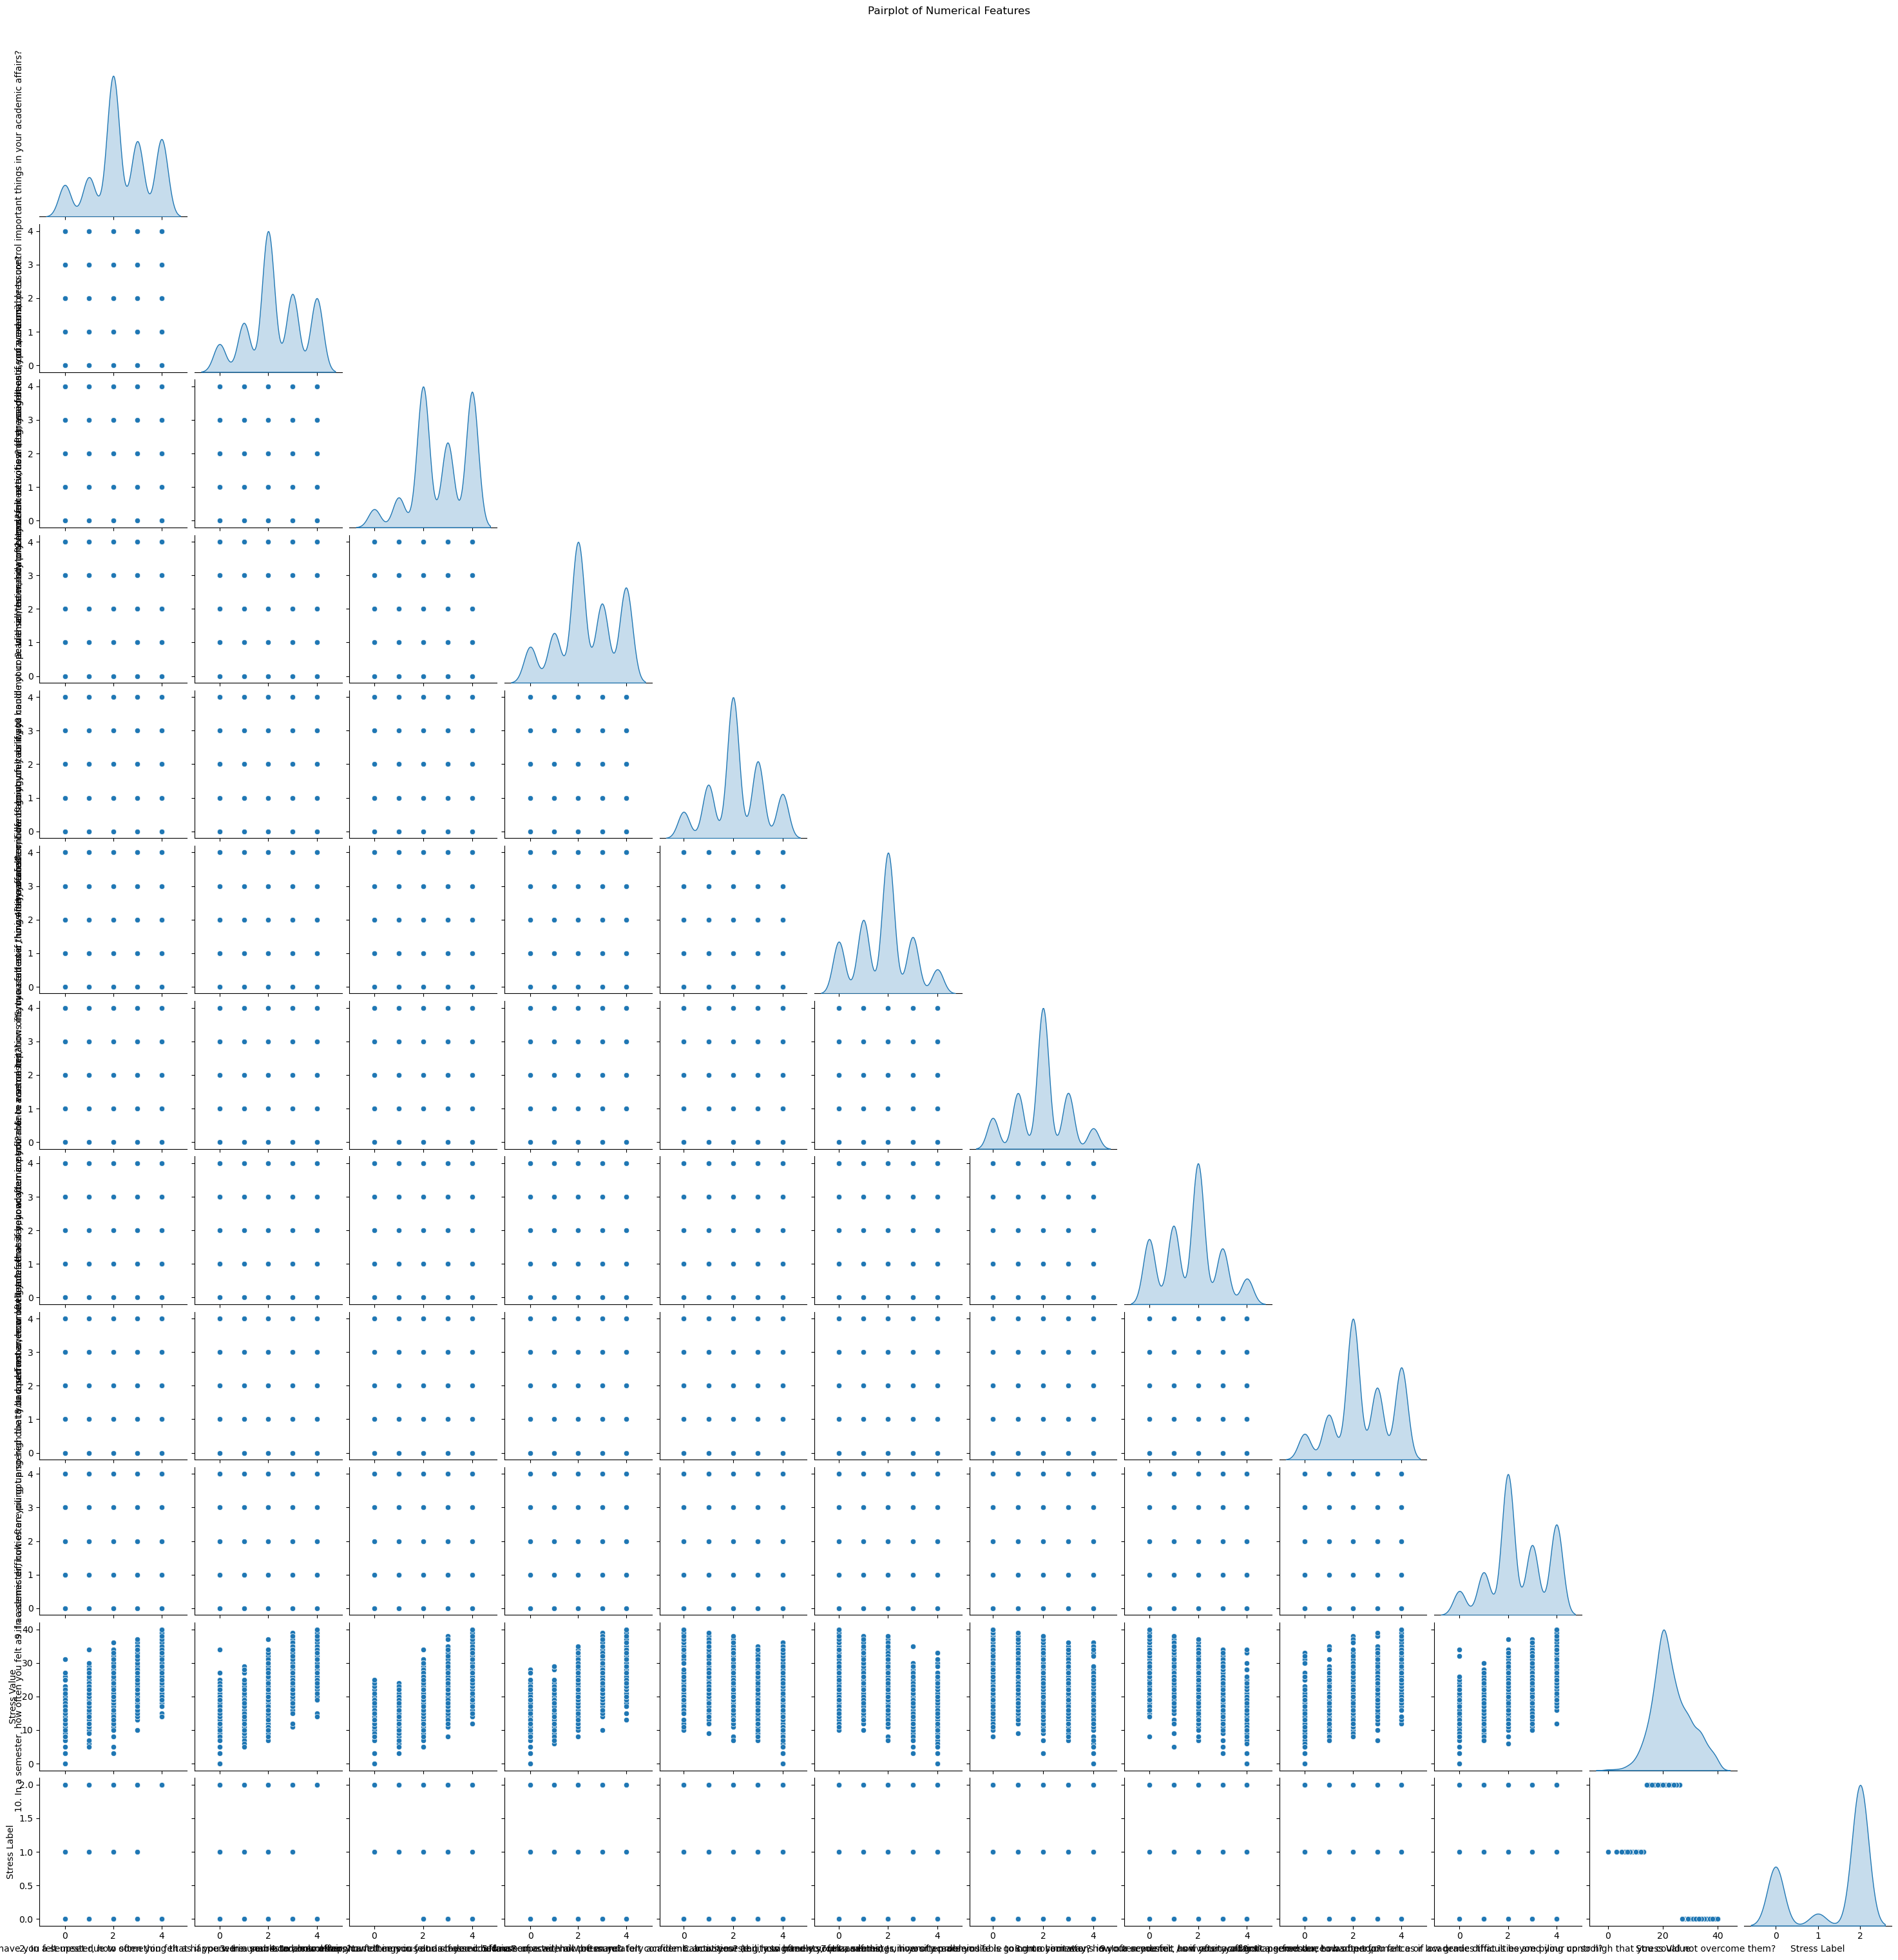

In [7]:
# Visual 2: Pairplot for Numerical Features
numeric_features = data.select_dtypes(include=['number'])
sns.pairplot(numeric_features, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


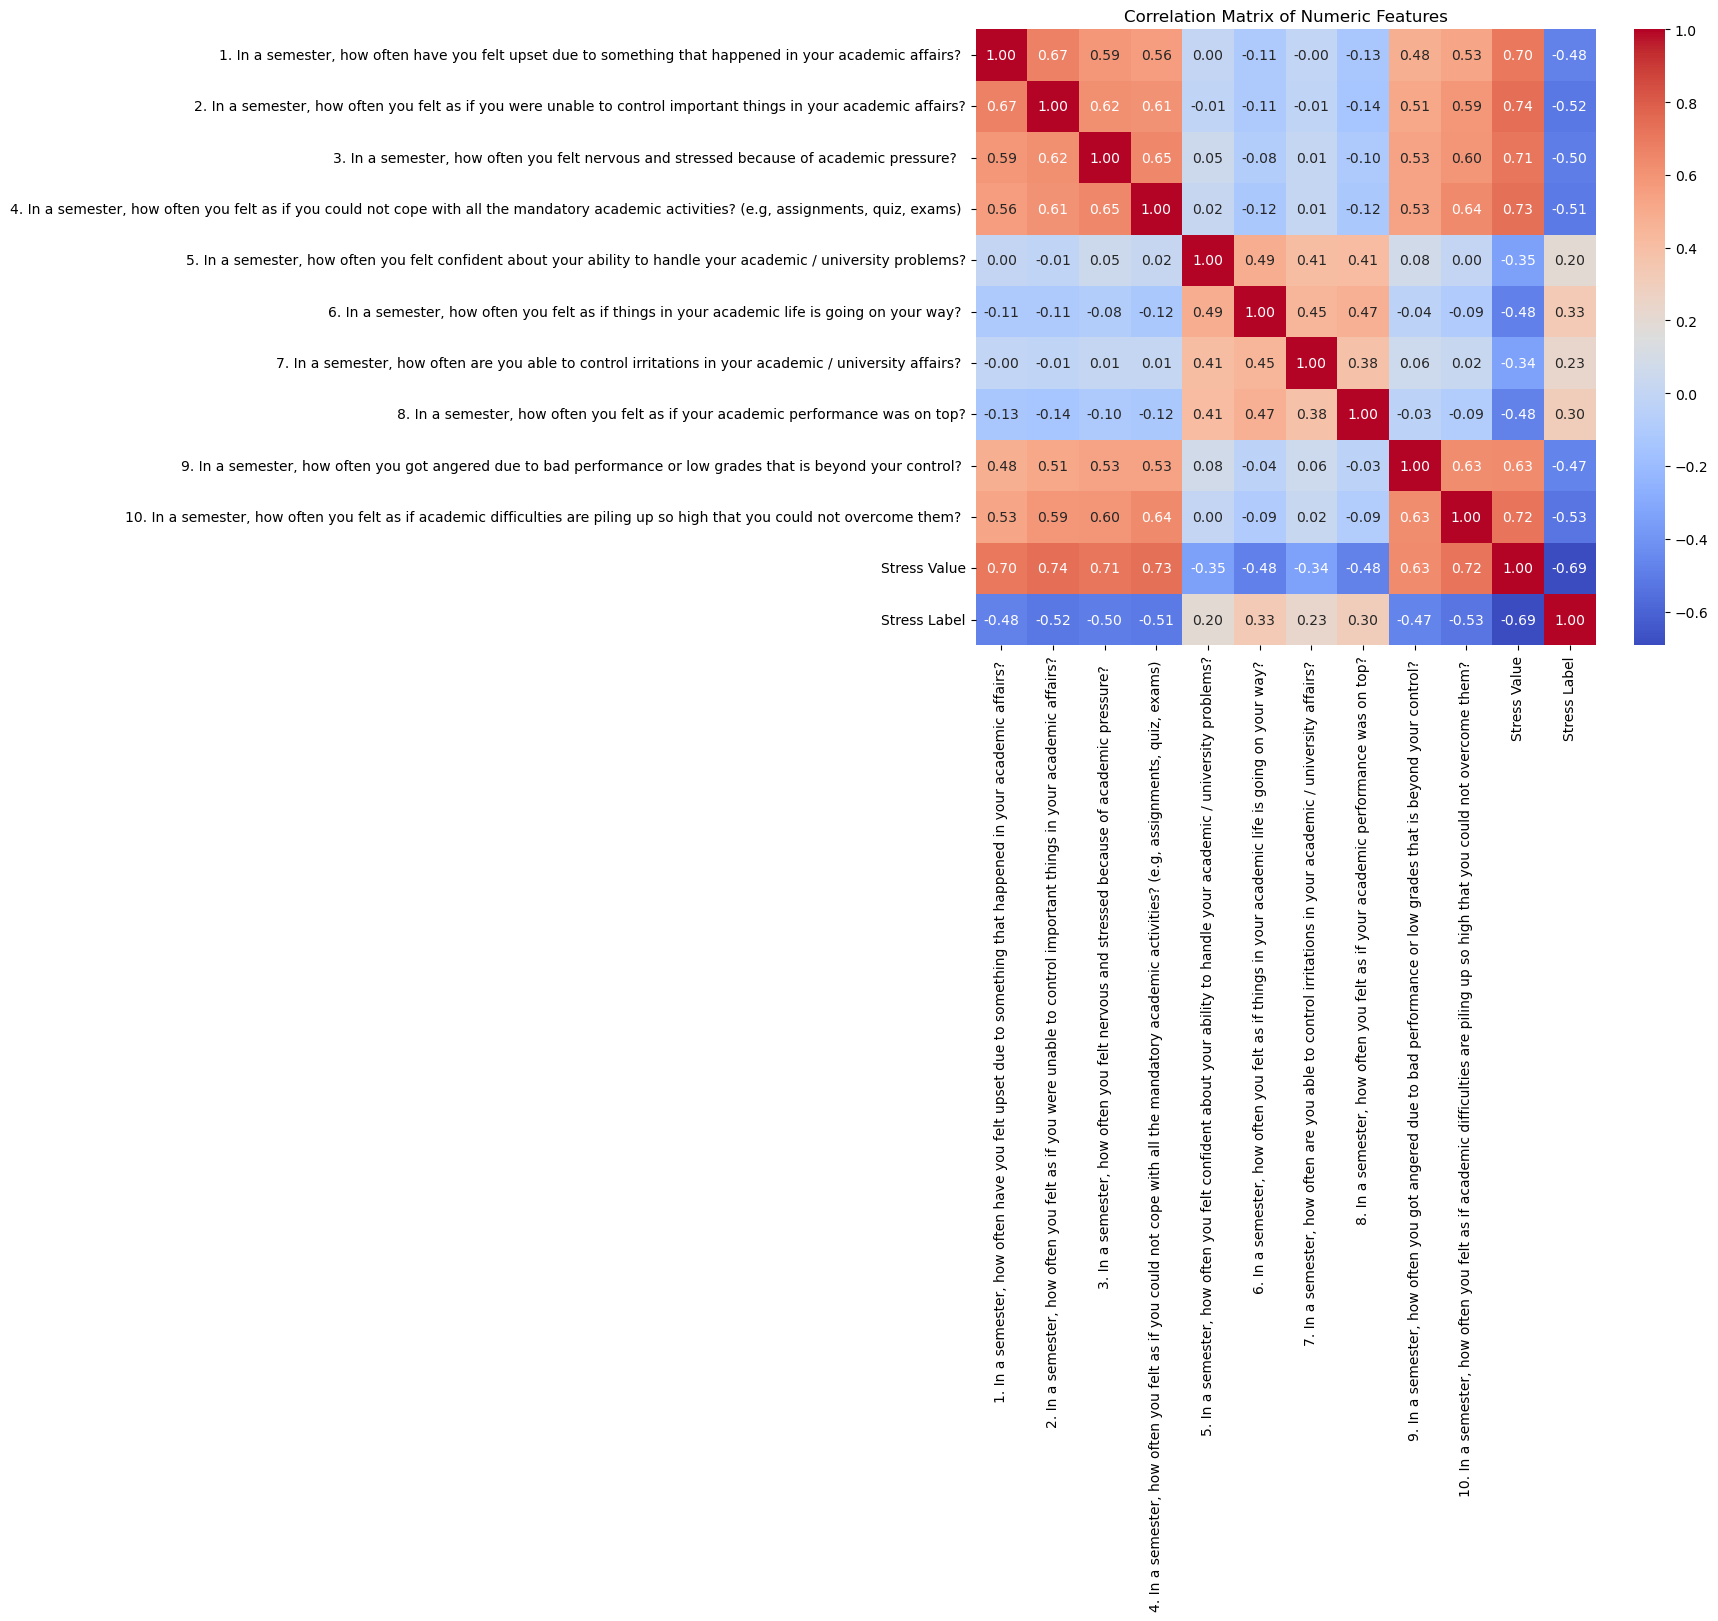

In [8]:
# Visual 3: Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


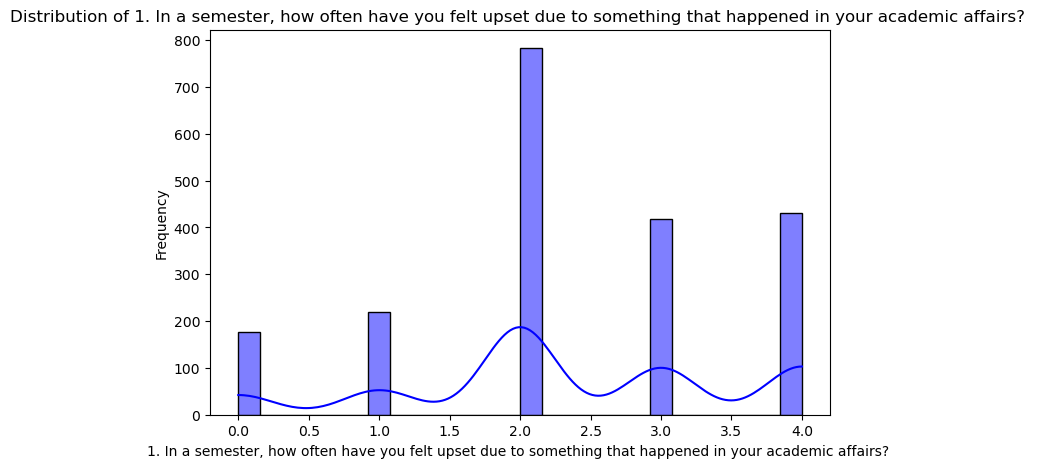

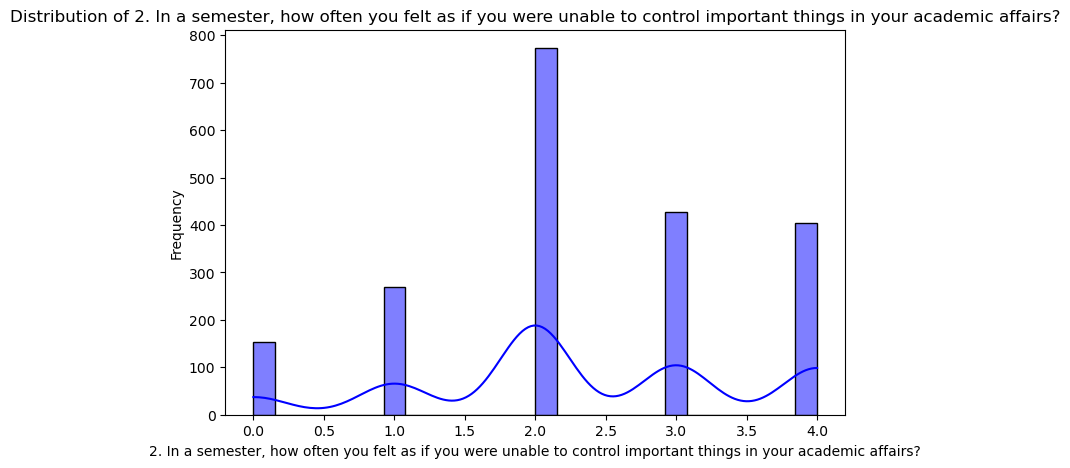

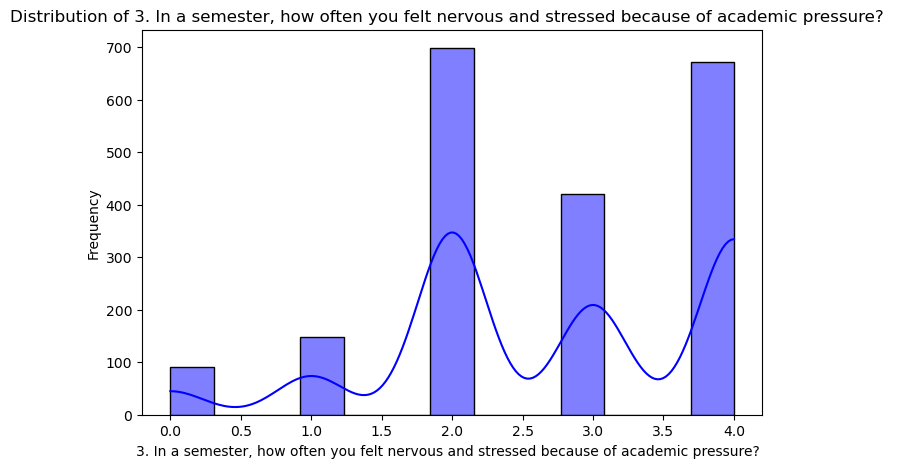

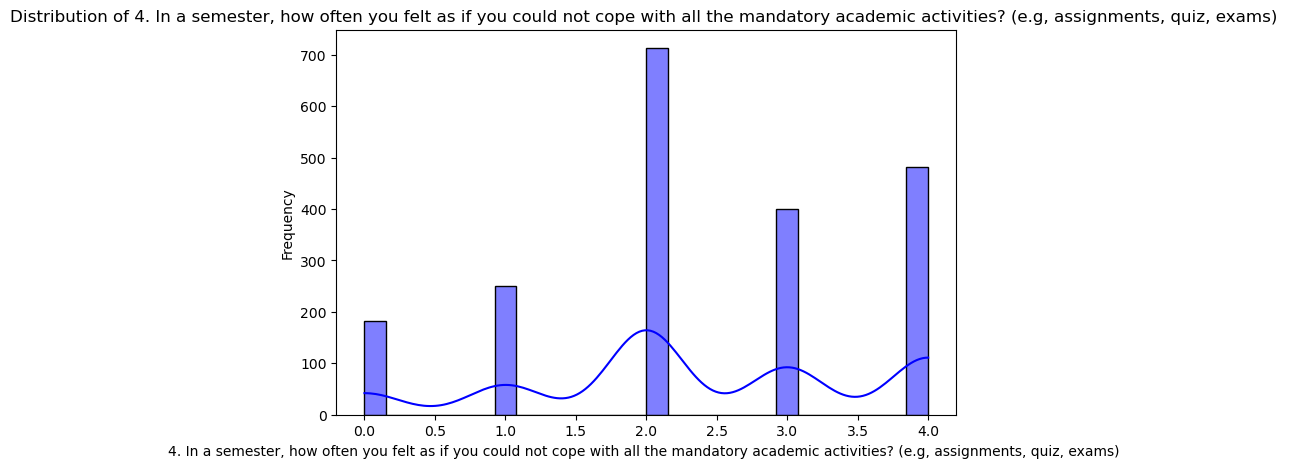

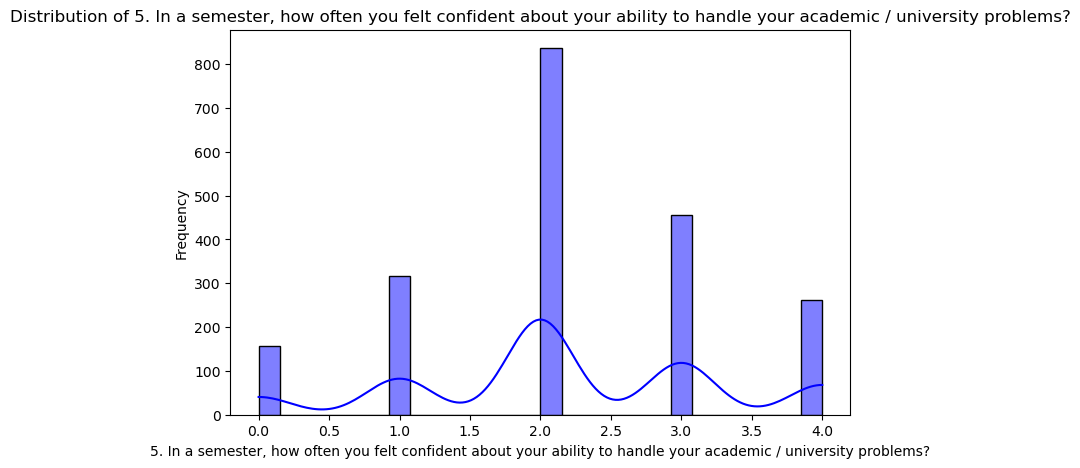

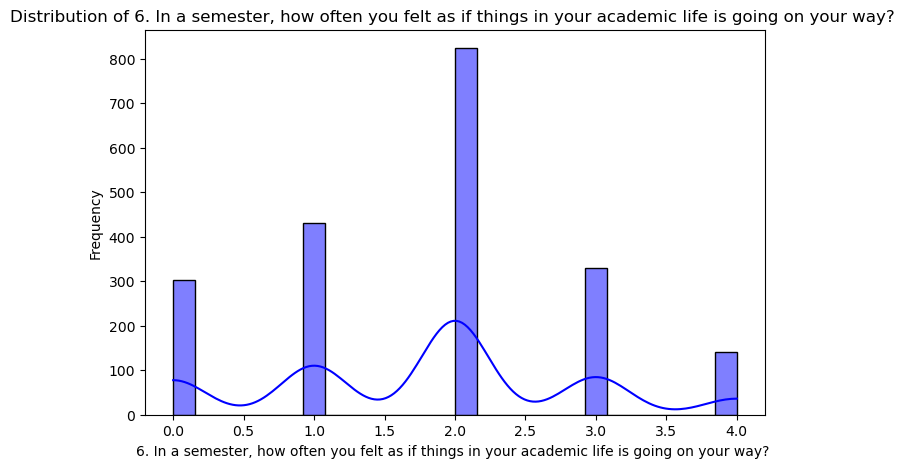

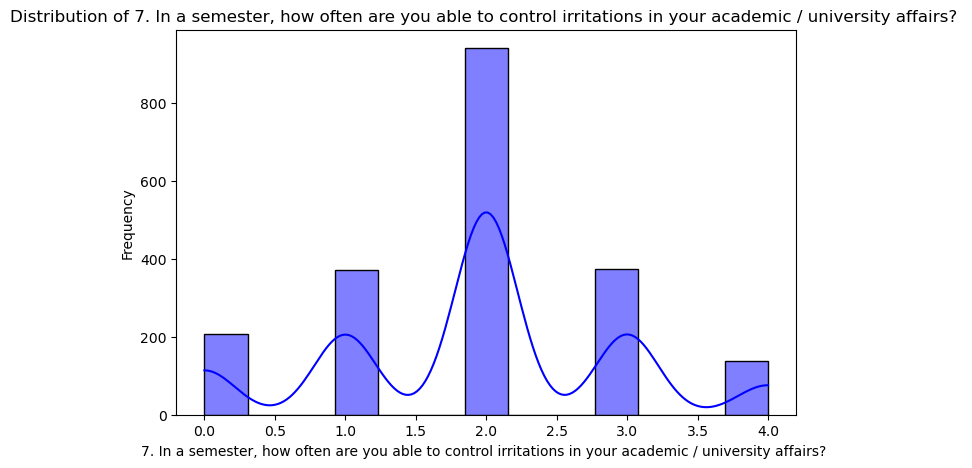

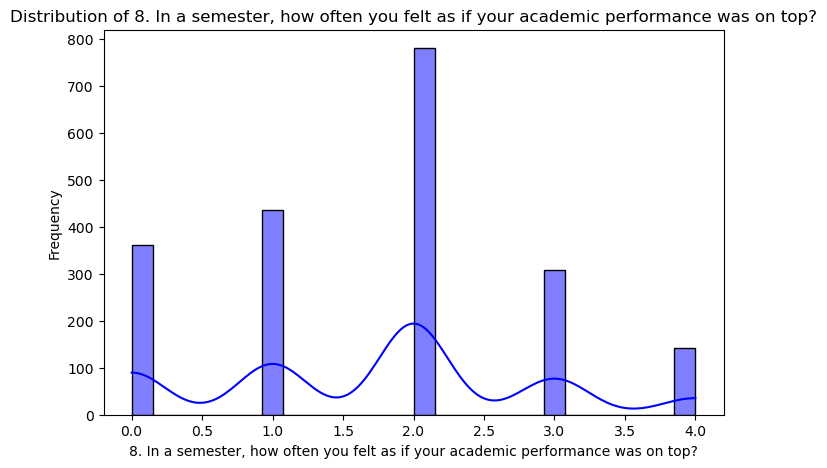

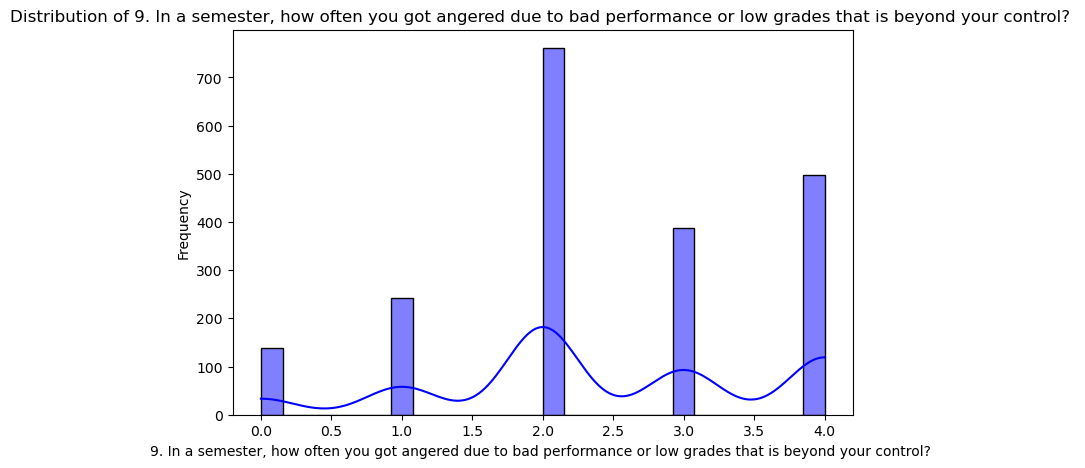

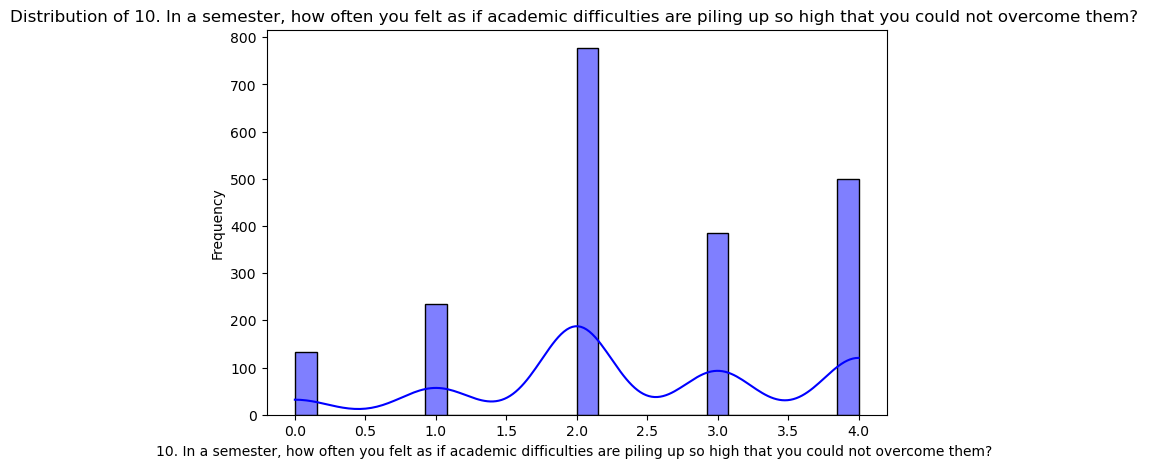

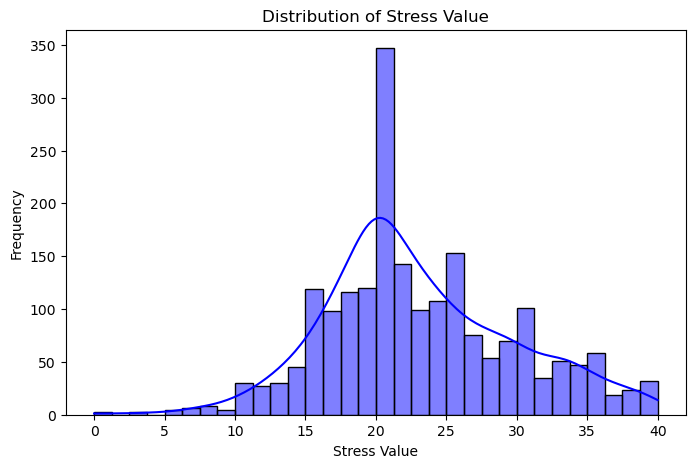

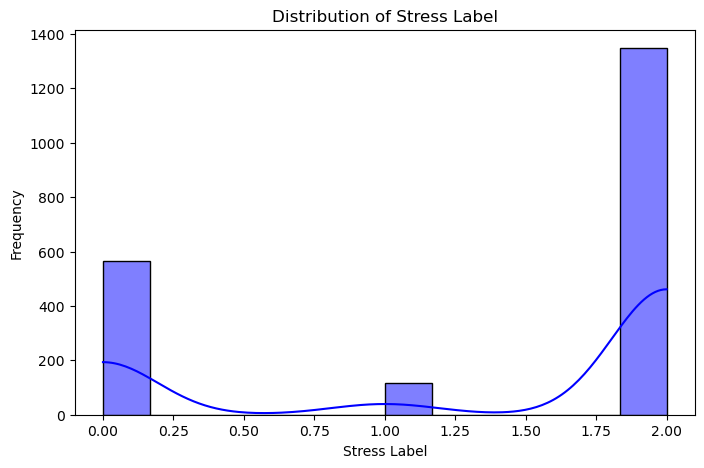

In [9]:
# Visual 4: Distribution of Each Numerical Feature
for column in numeric_features.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

C:\Users\suhan\AppData\Local\Temp\ipykernel_16948\2476814776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


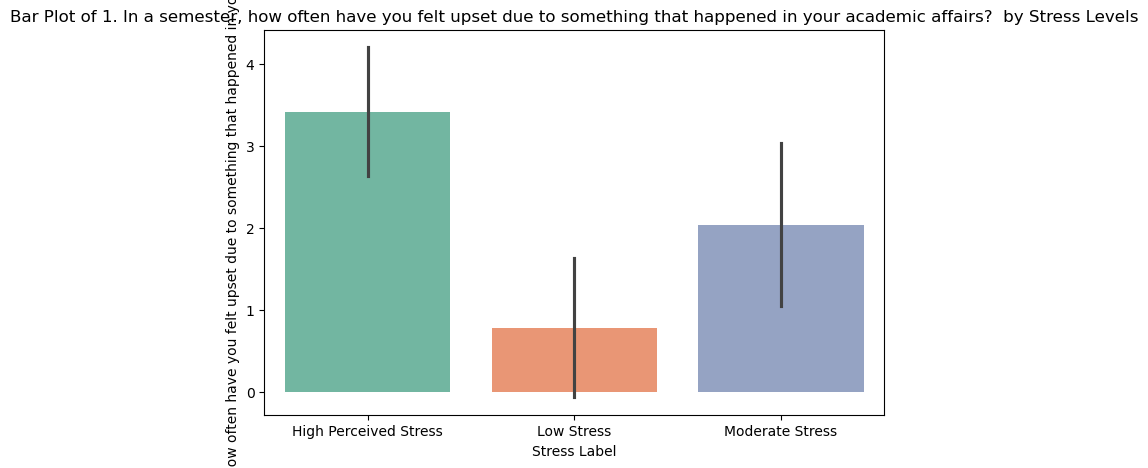

C:\Users\suhan\AppData\Local\Temp\ipykernel_16948\2476814776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


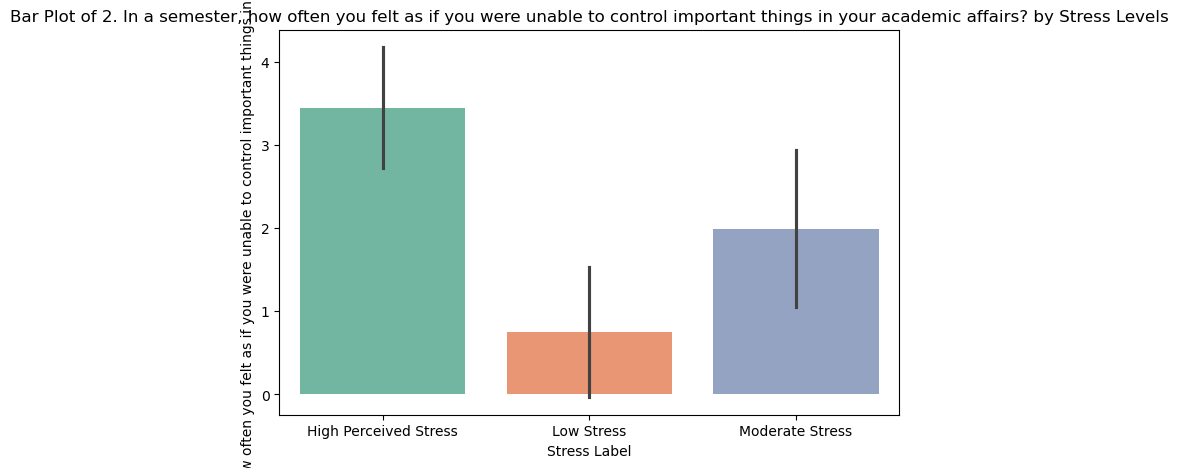

C:\Users\suhan\AppData\Local\Temp\ipykernel_16948\2476814776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


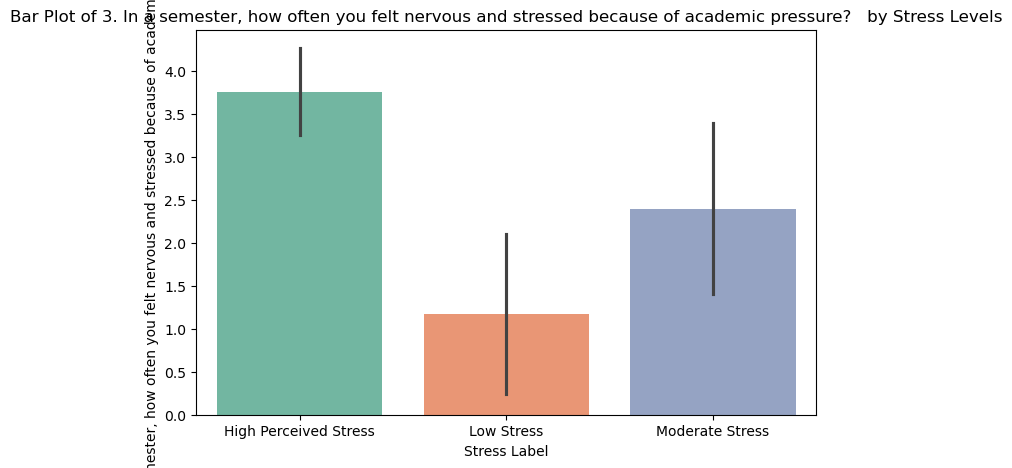

C:\Users\suhan\AppData\Local\Temp\ipykernel_16948\2476814776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


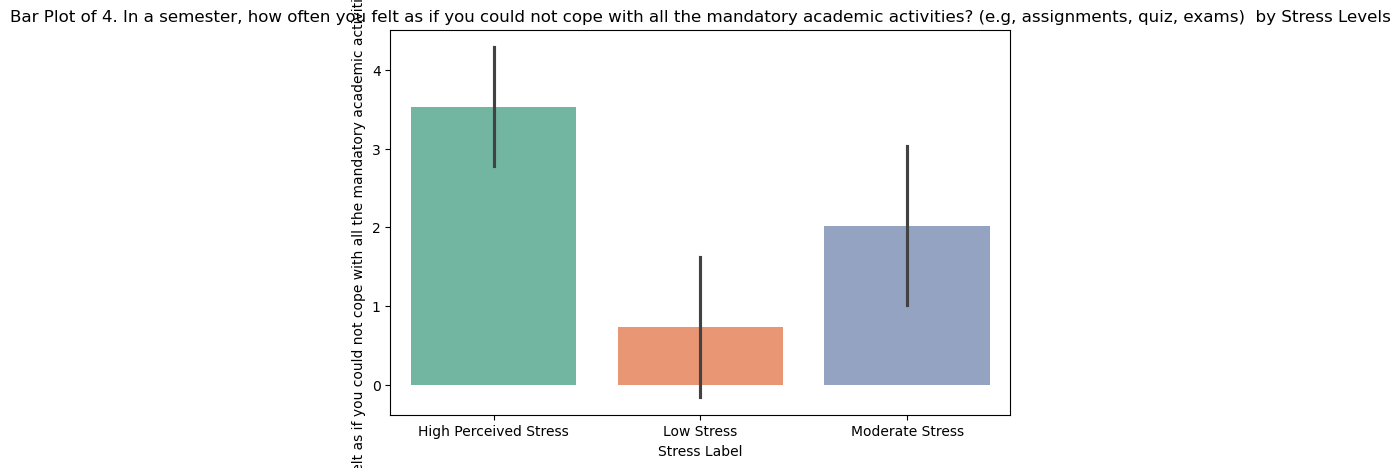

C:\Users\suhan\AppData\Local\Temp\ipykernel_16948\2476814776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


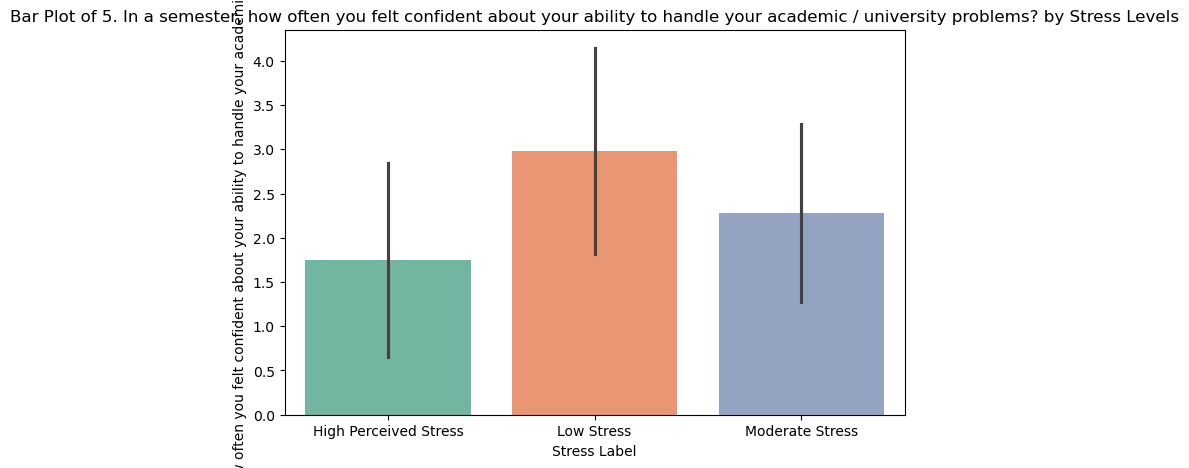

C:\Users\suhan\AppData\Local\Temp\ipykernel_16948\2476814776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


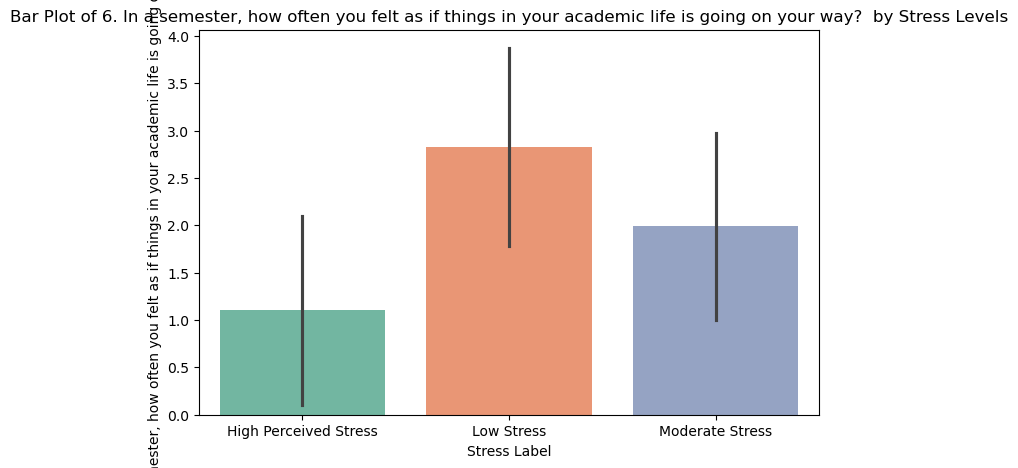

C:\Users\suhan\AppData\Local\Temp\ipykernel_16948\2476814776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


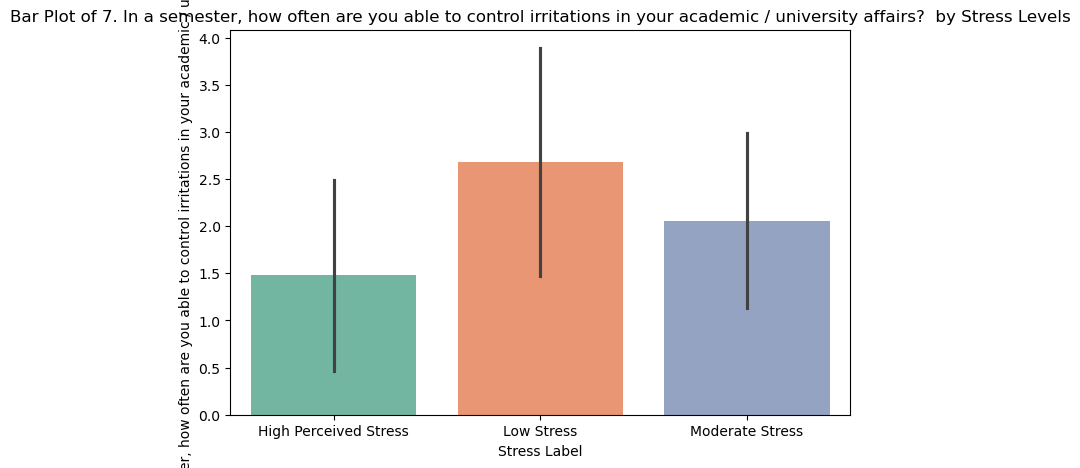

C:\Users\suhan\AppData\Local\Temp\ipykernel_16948\2476814776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


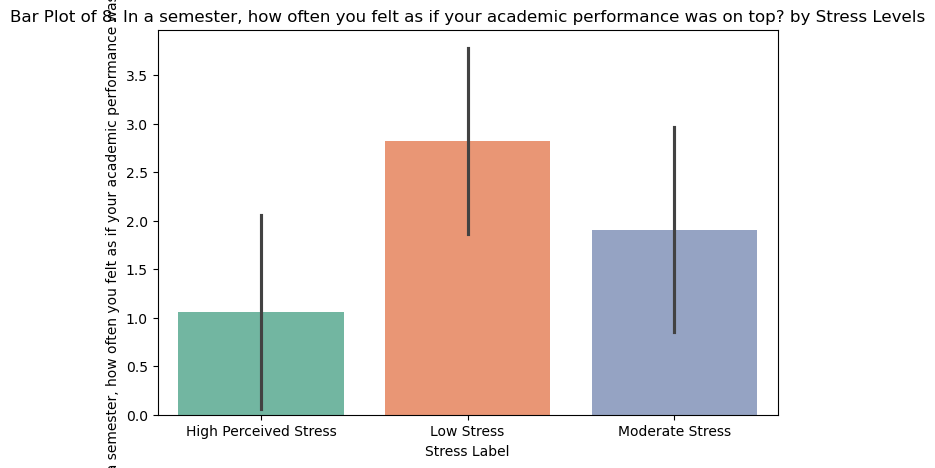

C:\Users\suhan\AppData\Local\Temp\ipykernel_16948\2476814776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


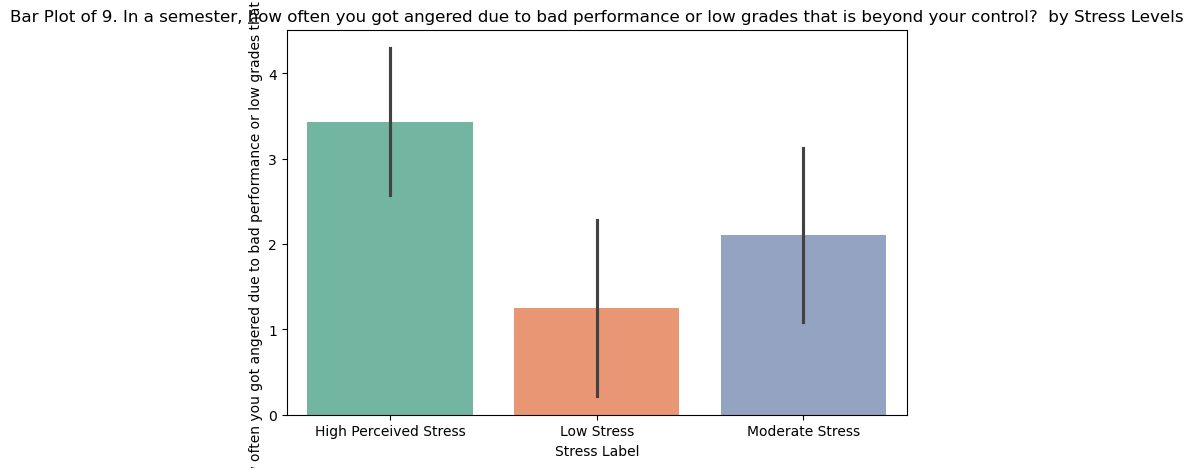

C:\Users\suhan\AppData\Local\Temp\ipykernel_16948\2476814776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


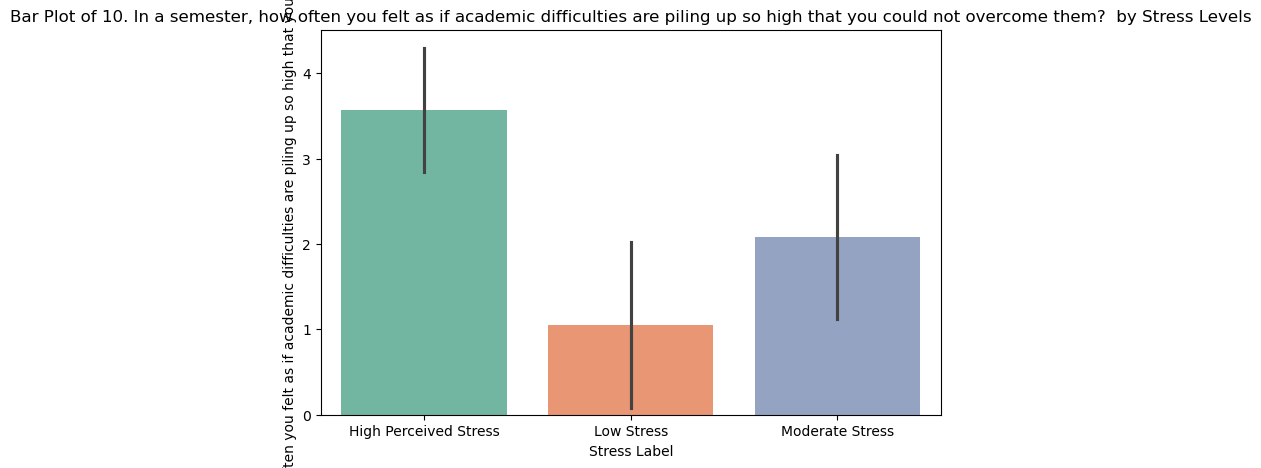

C:\Users\suhan\AppData\Local\Temp\ipykernel_16948\2476814776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


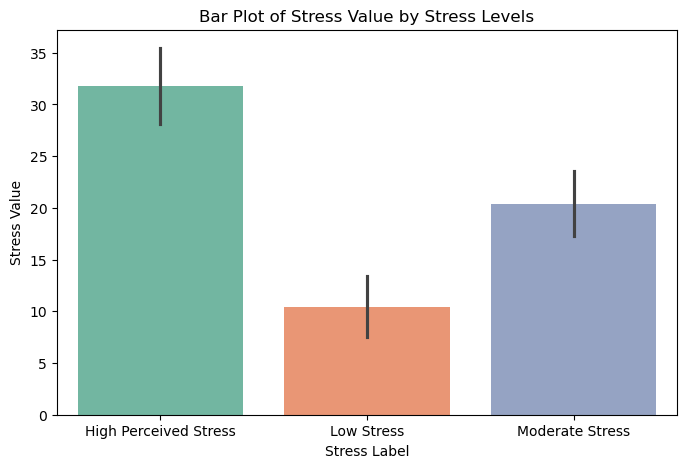

C:\Users\suhan\AppData\Local\Temp\ipykernel_16948\2476814776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


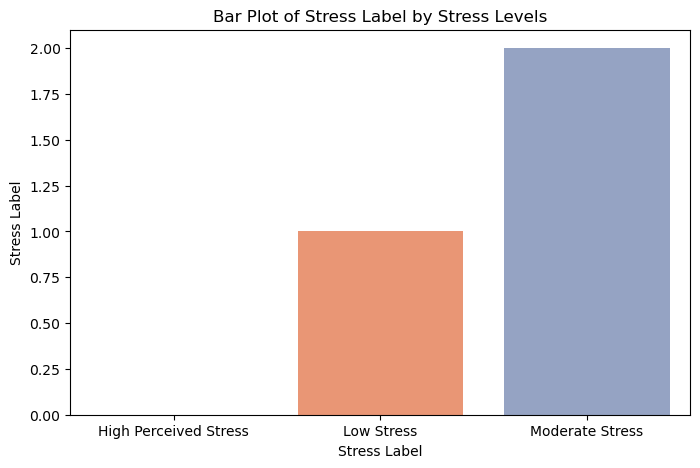

In [52]:
# Visual 5: Bar Plots for Stress Label and Numerical Features
for column in numeric_features.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(
        x=data['Stress Label'],
        y=data[column],
        palette='Set2',
        errorbar='sd'
    )
    plt.title(f"Bar Plot of {column} by Stress Levels")
    plt.xlabel("Stress Label")
    plt.ylabel(column)
    plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_)
    plt.show()


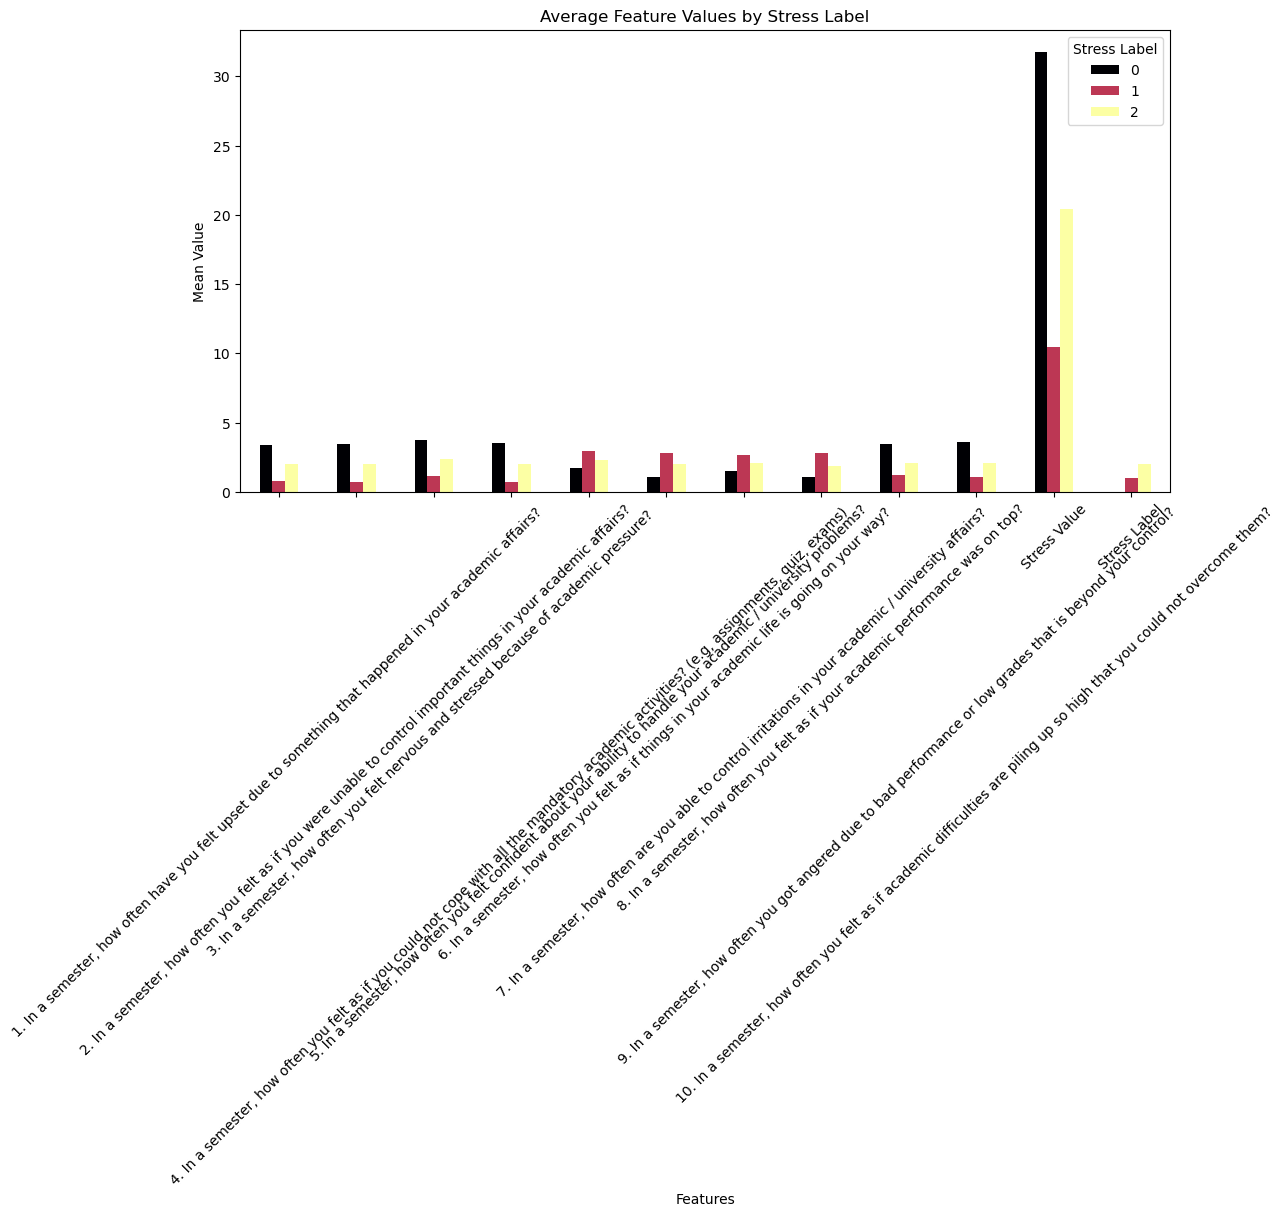

In [12]:
# Visual 6: Bar Plot of Stress Feature Values by Stress Label
avg_features = numeric_features.groupby(data['Stress Label']).mean()
avg_features.T.plot(kind='bar', figsize=(12, 6), colormap="inferno")
plt.title("Average Feature Values by Stress Label")
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.show()

In [13]:
# Step 3: Train-Test Split
features = data.iloc[:, 7:17]
target = data['Stress Label']
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

In [14]:
# Step 4: Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}


In [15]:
# Train the models and evaluate
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') #'weighted' for multiclass
    recall = recall_score(y_test, y_pred, average='weighted') #'weighted' for multiclass
    f1 = f1_score(y_test, y_pred, average='weighted') #'weighted' for multiclass

    # Display metrics
    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision (Weighted): {precision:.2f}") # Updated label
    print(f"Recall (Weighted): {recall:.2f}") # Updated label
    print(f"F1-Score (Weighted): {f1:.2f}") # Updated label


Metrics for Logistic Regression:
Accuracy: 1.00
Precision (Weighted): 1.00
Recall (Weighted): 1.00
F1-Score (Weighted): 1.00

Metrics for Decision Tree:
Accuracy: 0.90
Precision (Weighted): 0.90
Recall (Weighted): 0.90
F1-Score (Weighted): 0.90

Metrics for Random Forest:
Accuracy: 0.96
Precision (Weighted): 0.96
Recall (Weighted): 0.96
F1-Score (Weighted): 0.96


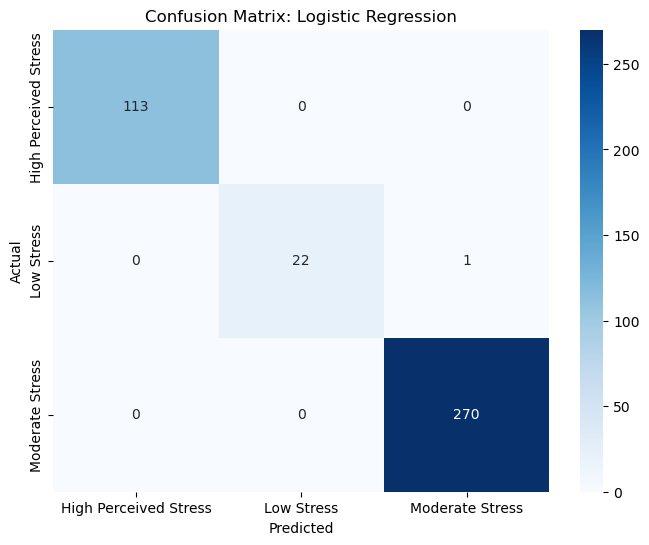

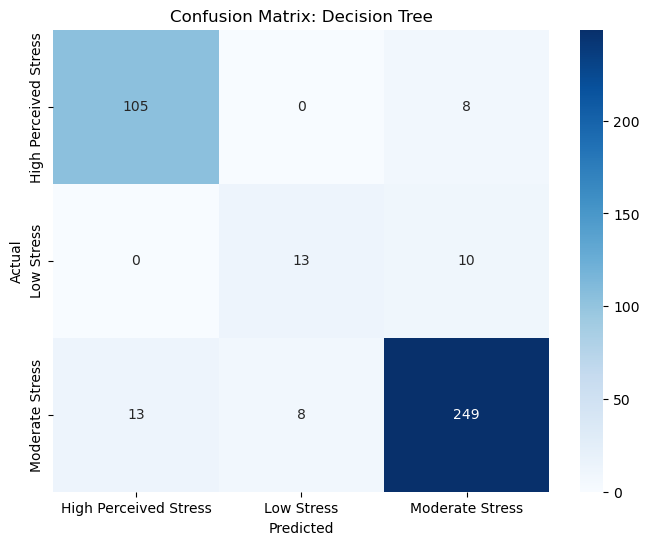

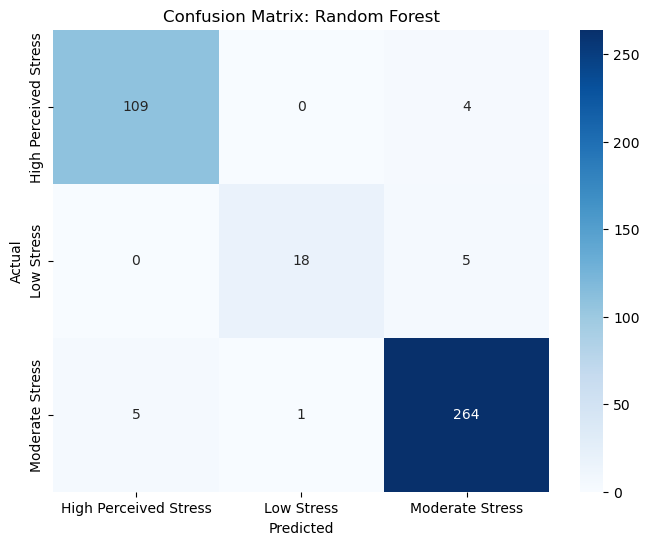

In [59]:
# Step 5: Train, Predict, and Evaluate
results = []
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Generate classification report
    # Convert label_encoder.classes_ to a list of strings
    target_names = [str(label) for label in label_encoder.classes_]
    report = classification_report(y_test, y_pred, target_names=target_names)
    # Save results
    results.append({"Model": model_name, "Accuracy": accuracy, "Report": report})

    # Visual 7: Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [55]:
# Step 6: Cross-Validation
cv_results = {}
print("\nCross-Validation Results:")
for model_name, model in models.items():
    scores = cross_val_score(model, features, target, cv=5, scoring='accuracy')
    cv_results[model_name] = scores
    print(f"{model_name}: Mean CV Accuracy = {scores.mean():.4f}, Scores = {scores}")



Cross-Validation Results:
Logistic Regression: Mean CV Accuracy = 0.9961, Scores = [0.99753695 0.99507389 0.99507389 0.99259259 1.        ]
Decision Tree: Mean CV Accuracy = 0.8895, Scores = [0.87931034 0.87192118 0.91133005 0.8962963  0.88888889]
Random Forest: Mean CV Accuracy = 0.9428, Scores = [0.95566502 0.95073892 0.94334975 0.9382716  0.92592593]


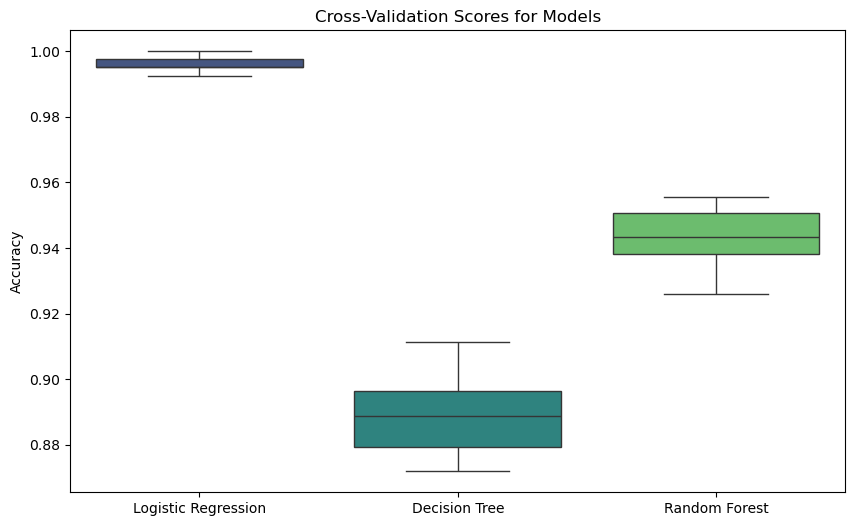

In [61]:
# Visual 8: Cross-Validation Scores Boxplot
cv_df = pd.DataFrame(cv_results)
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_df, palette="viridis")
plt.title("Cross-Validation Scores for Models")
plt.ylabel("Accuracy")
plt.show()

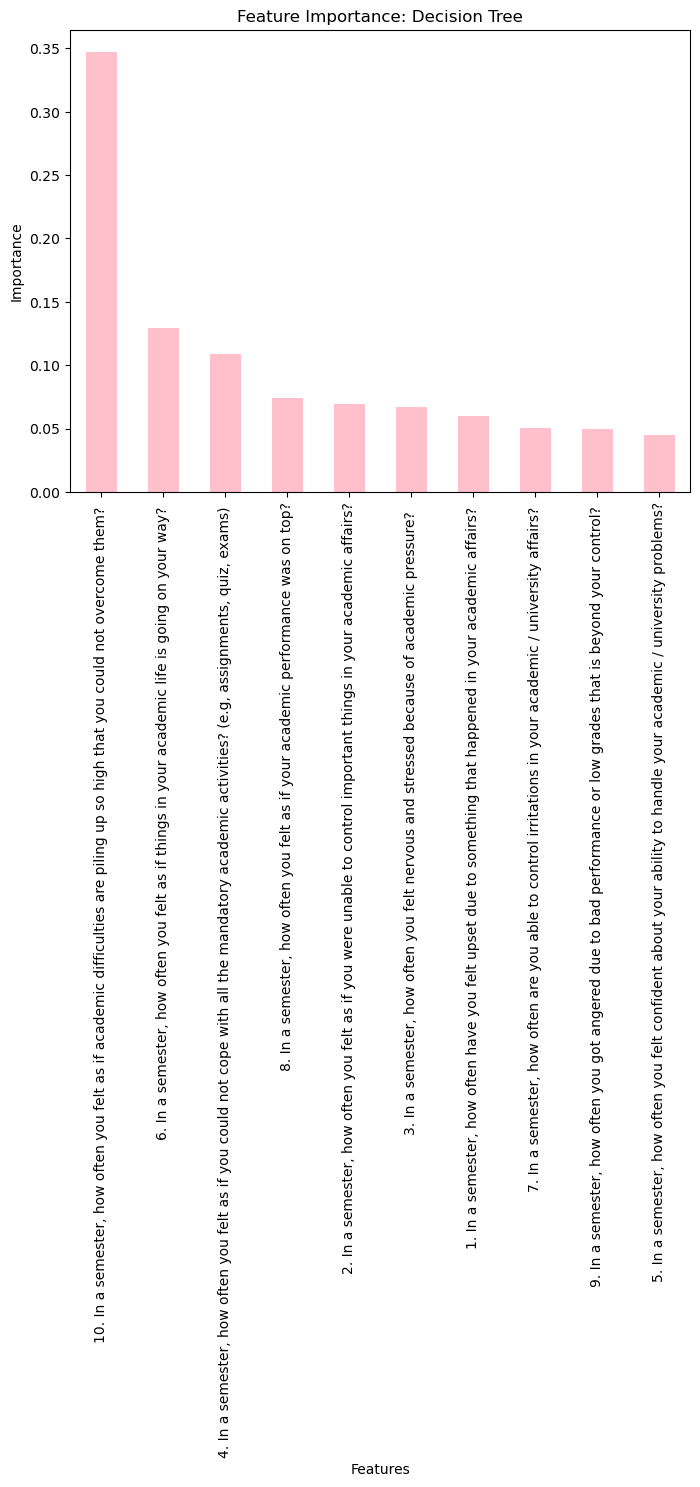

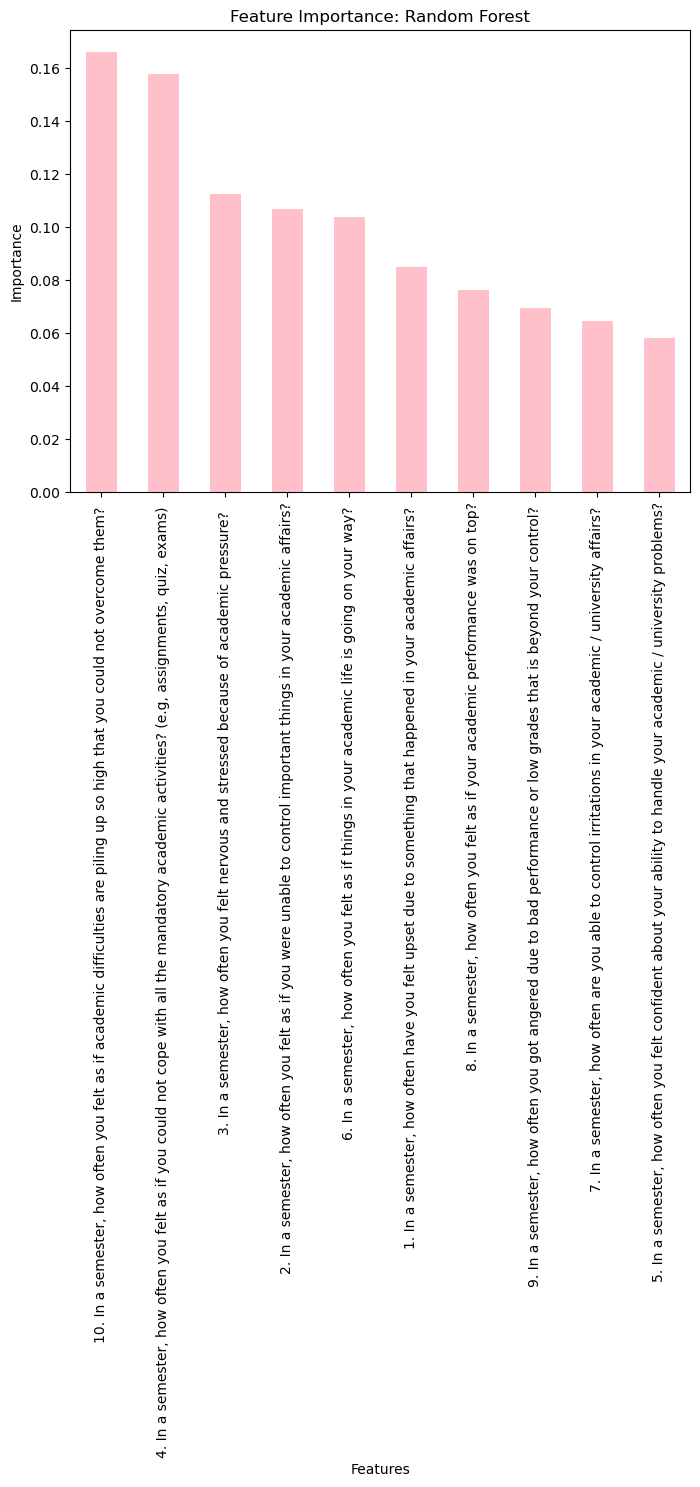

In [63]:
# Visual 9: Feature Importance for Tree-Based Models
for model_name, model in models.items():
    if hasattr(model, "feature_importances_"):
        plt.figure(figsize=(8, 6))
        importance = pd.Series(model.feature_importances_, index=features.columns)
        importance.sort_values(ascending=False).plot(kind='bar', color='pink')
        plt.title(f"Feature Importance: {model_name}")
        plt.ylabel("Importance")
        plt.xlabel("Features")
        plt.show()

In [20]:
# Step 7: Summary of Results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Report"])
print("\nSummary of Model Performance:")
print(results_df[["Model", "Accuracy"]])


Summary of Model Performance:
                 Model  Accuracy
0  Logistic Regression  0.997537
1        Decision Tree  0.903941
2        Random Forest  0.963054


In [21]:
# @title Default title text
import numpy as np

# Assuming the Random Forest model is already trained
# Features: The columns used for training (ensure feature order matches training data)
feature_columns = features.columns

# Create a function to take user input and predict the stress level
def predict_stress_level(model, feature_columns):
    print("\n--- Stress Level Prediction ---")
    user_input = []
    for feature in feature_columns:
        while True:
            try:
                value = float(input(f"Enter value for '{feature}': "))
                user_input.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")

    # Convert user input into a NumPy array and reshape for prediction
    input_array = np.array(user_input).reshape(1, -1)

    # Predict stress level
    prediction = model.predict(input_array)
    predicted_label = label_encoder.inverse_transform(prediction)

    print("\n--- Prediction Result ---")
    print(f"Predicted Stress Level: {predicted_label[0]}")


# Use the trained Random Forest model for prediction
predict_stress_level(models["Random Forest"], feature_columns)



--- Stress Level Prediction ---


Enter value for '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ':  0
Enter value for '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?':  1
Enter value for '3. In a semester, how often you felt nervous and stressed because of academic pressure?  ':  4
Enter value for '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ':  1
Enter value for '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?':  4
Enter value for '6. In a semester, how often you felt as if things in your academic life is going on your way? ':  1
Enter value for '7. In a semester, how often are you able to control irritations in your academic / university affairs? ':  0
Enter value for '8. In a semester, how often you felt as if your academic performance 


--- Prediction Result ---
Predicted Stress Level: Moderate Stress


C:\Users\suhan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
